In [2]:
pip install uxsim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.2/276.2 kB 11.9 MB/s eta 0:00:00


simulation setting:
 scenario name: 
 simulation duration:	 1200 s
 number of vehicles:	 810 veh
 total road length:	 3000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 240
 number of platoons:	 162
 number of links:	 3
 number of nodes:	 4
 setup time:		 0.02 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      130 vehs|  13.8 m/s|     0.05 s
    1195 s|       75 vehs|  13.0 m/s|     0.10 s
 simulation finished
results:
 average speed:	 11.7 m/s
 number of completed trips:	 735 / 810
 average travel time of trips:	 162.6 s
 average delay of trips:	 62.6 s
 delay ratio:			 0.385
 total distance traveled:	 1632250.0 m


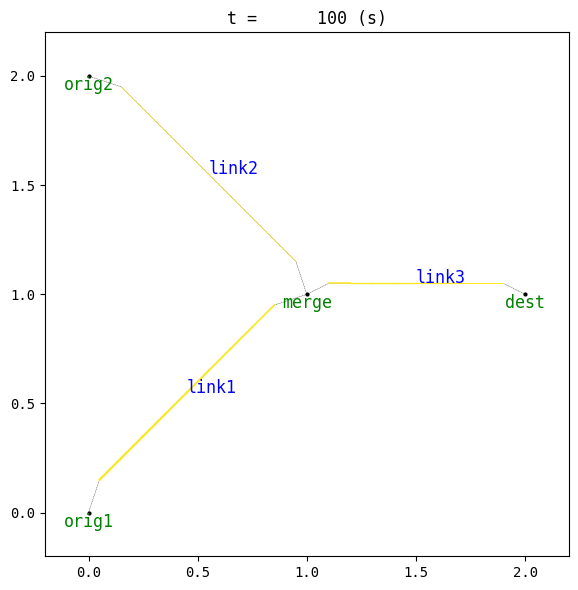

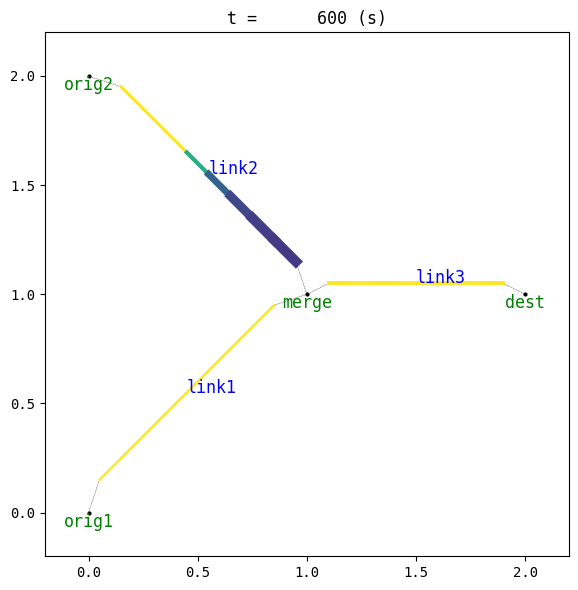

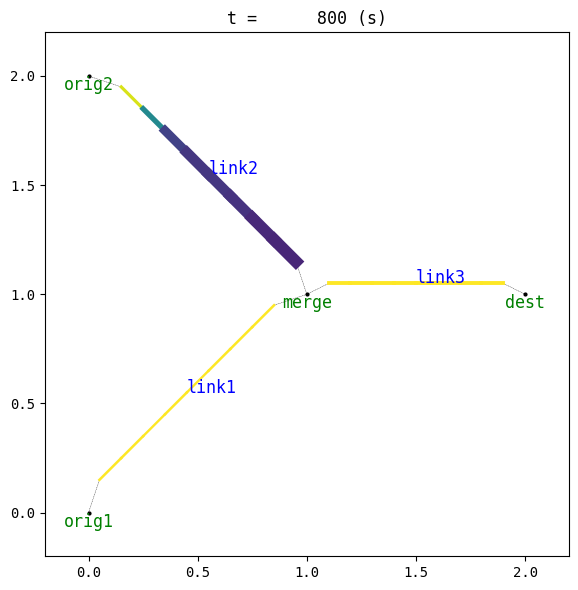

In [4]:
from uxsim import *

# Define the main simulation
# Units are standardized to seconds (s) and meters (m)
W = World(
    name="",    # Scenario name
    deltan=5,   # Simulation aggregation unit delta n
    tmax=1200,  # Total simulation time (s)
    print_mode=1, save_mode=1, show_mode=1,    # Various options
    random_seed=0    # Set the random seed
)

# Define the scenario
## Create nodes
W.addNode(name="orig1", x=0, y=0)
W.addNode("orig2", 0, 2)
W.addNode("merge", 1, 1)
W.addNode("dest", 2, 1)
## Create links between nodes
W.addLink(name="link1", start_node="orig1", end_node="merge",
          length=1000, free_flow_speed=20, number_of_lanes=1)
W.addLink("link2", "orig2", "merge", length=1000, free_flow_speed=20, number_of_lanes=1)
W.addLink("link3", "merge", "dest", length=1000, free_flow_speed=20, number_of_lanes=1)
## Create OD traffic demand between nodes
W.adddemand(orig="orig1", dest="dest", t_start=0, t_end=1000, flow=0.45)
W.adddemand("orig2", "dest", 400, 1000, 0.6)

# Run the simulation to the end
W.exec_simulation()

# Print summary of simulation result
W.analyzer.print_simple_stats()

# Visualize snapshots of network traffic state for several timesteps
W.analyzer.network(100, detailed=1, network_font_size=12)
W.analyzer.network(600, detailed=1, network_font_size=12)
W.analyzer.network(800, detailed=1, network_font_size=12)